In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
Load Data

In [ ]:
data=pd.read_csv('ML Assignment Dataset.csv')
print(data)

       Longitude;Latitude
0     36.861544;-5.177747
1      51.463766;5.392935
2      51.190492;4.453765
3      51.326247;6.085953
4      51.463766;5.392935
...                   ...
9890  54.259133;-2.832702
9891   47.771913;1.642025
9892   51.973487;4.133423
9893     50.2074;7.336791
9894  37.290131;13.586804

[9895 rows x 1 columns]


In [ ]:
data[['Longitude', 'Latitude']] = data['Longitude;Latitude'].str.split(';', expand=True)

# Drop the original combined column
data = data[['Longitude', 'Latitude']]

# Convert the data to numeric type for consistency
data['Longitude'] = pd.to_numeric(data['Longitude'], errors='coerce')
data['Latitude'] = pd.to_numeric(data['Latitude'], errors='coerce')

# Display the first few rows of the modified dataset
data.head()

<ipython-input-3-c76ef1dfbc5b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Longitude'] = pd.to_numeric(data['Longitude'], errors='coerce')
<ipython-input-3-c76ef1dfbc5b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Latitude'] = pd.to_numeric(data['Latitude'], errors='coerce')


,Longitude,Latitude
0,36.861544,-5.177747
1,51.463766,5.392935
2,51.190492,4.453765
3,51.326247,6.085953
4,51.463766,5.392935


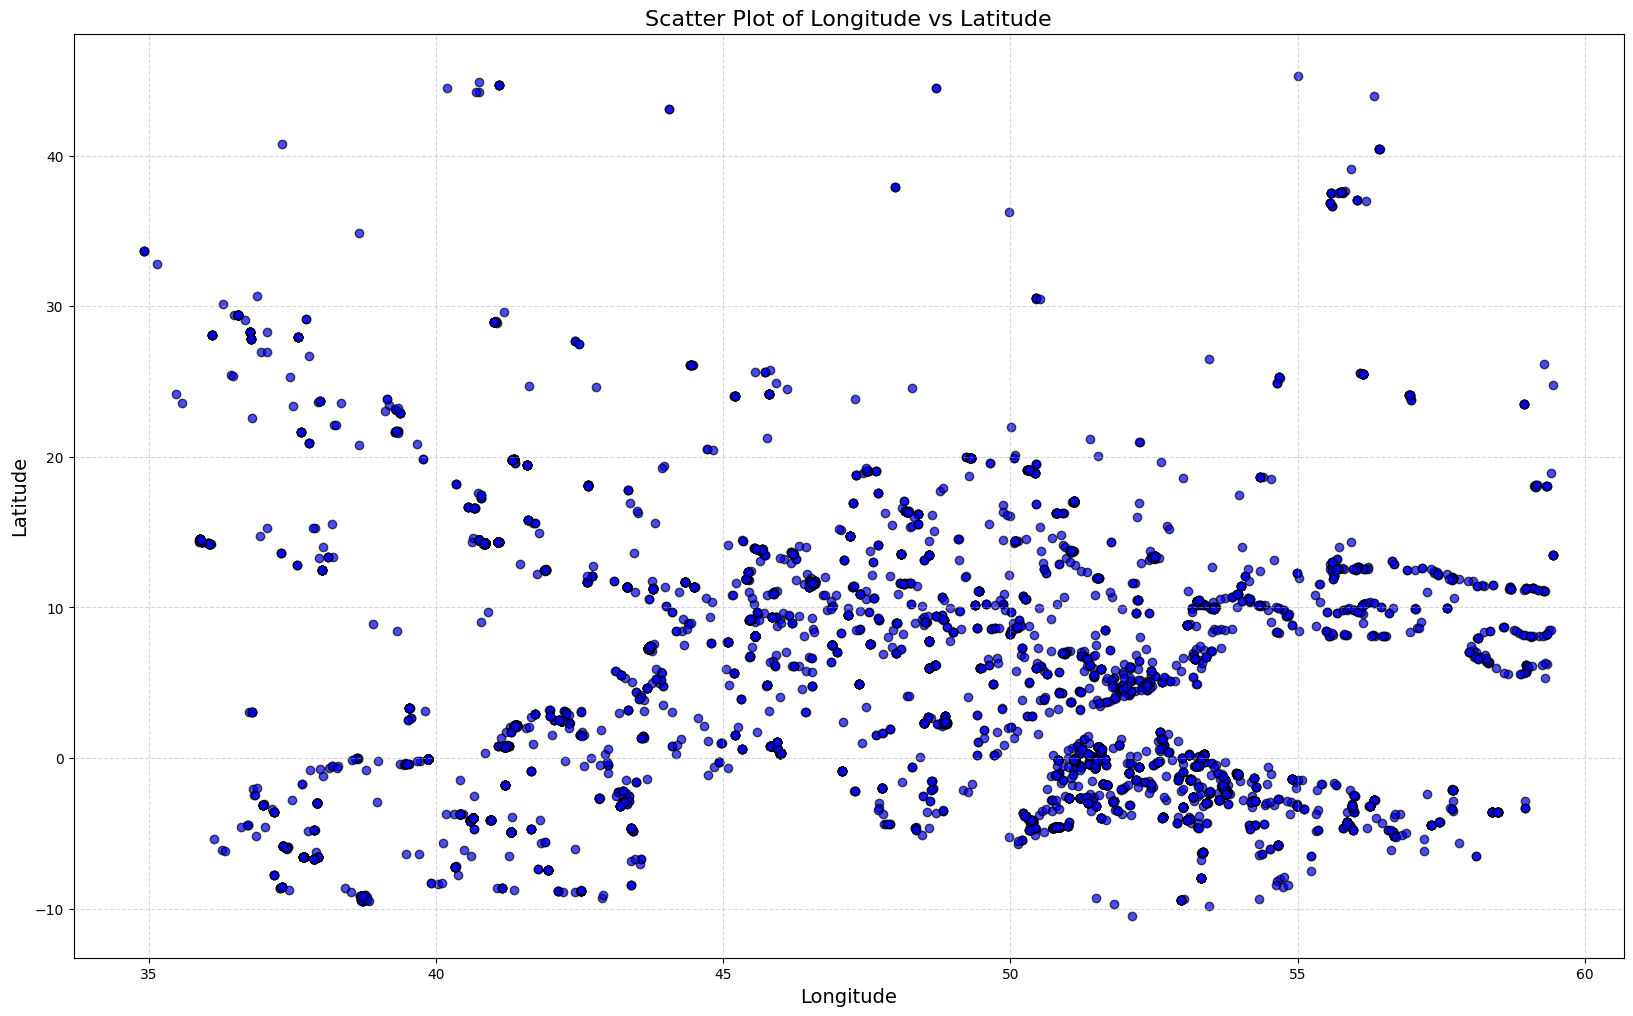

In [ ]:
# Plot the graph with Longitude on the x-axis and Latitude on the y-axis
plt.figure(figsize=(20, 12))
plt.scatter(data['Longitude'], data['Latitude'], c='blue', alpha=0.7, edgecolor='k')

# Set plot title and axis labels
plt.title('Scatter Plot of Longitude vs Latitude', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

In [ ]:
No missing values but possible duplicates because dark blue colour in some regions

In [ ]:
# Check for duplicate rows in the dataset
duplicate_rows = data[data.duplicated()]

# Count and display duplicate rows if any
num_duplicates = duplicate_rows.shape[0]
duplicate_rows, num_duplicates


(      Longitude  Latitude
 4     51.463766  5.392935
 5     51.190492  4.453765
 14    48.836108  2.381694
 15    48.836108  2.381694
 16    48.836108  2.381694
 ...         ...       ...
 9883  46.889164  7.522448
 9885  37.315055 -8.554208
 9887  51.446999  5.500835
 9889  54.259133 -2.832702
 9890  54.259133 -2.832702
 
 [3965 rows x 2 columns],
 3965)

In [ ]:
Remove duplicates

In [ ]:
# Remove duplicate rows from the dataset
data_cleaned = data.drop_duplicates()

# Display the number of rows before and after removing duplicates
original_count = data.shape[0]
cleaned_count = data_cleaned.shape[0]

original_count, cleaned_count, data_cleaned.head()


(9895,
 5930,
    Longitude  Latitude
 0  36.861544 -5.177747
 1  51.463766  5.392935
 2  51.190492  4.453765
 3  51.326247  6.085953
 6  54.529777  9.029133)

In [ ]:
data_cleaned

,Longitude,Latitude
0,36.861544,-5.177747
1,51.463766,5.392935
2,51.190492,4.453765
3,51.326247,6.085953
6,54.529777,9.029133
...,...,...
9888,50.003216,9.717080
9891,47.771913,1.642025
9892,51.973487,4.133423
9893,50.207400,7.336791


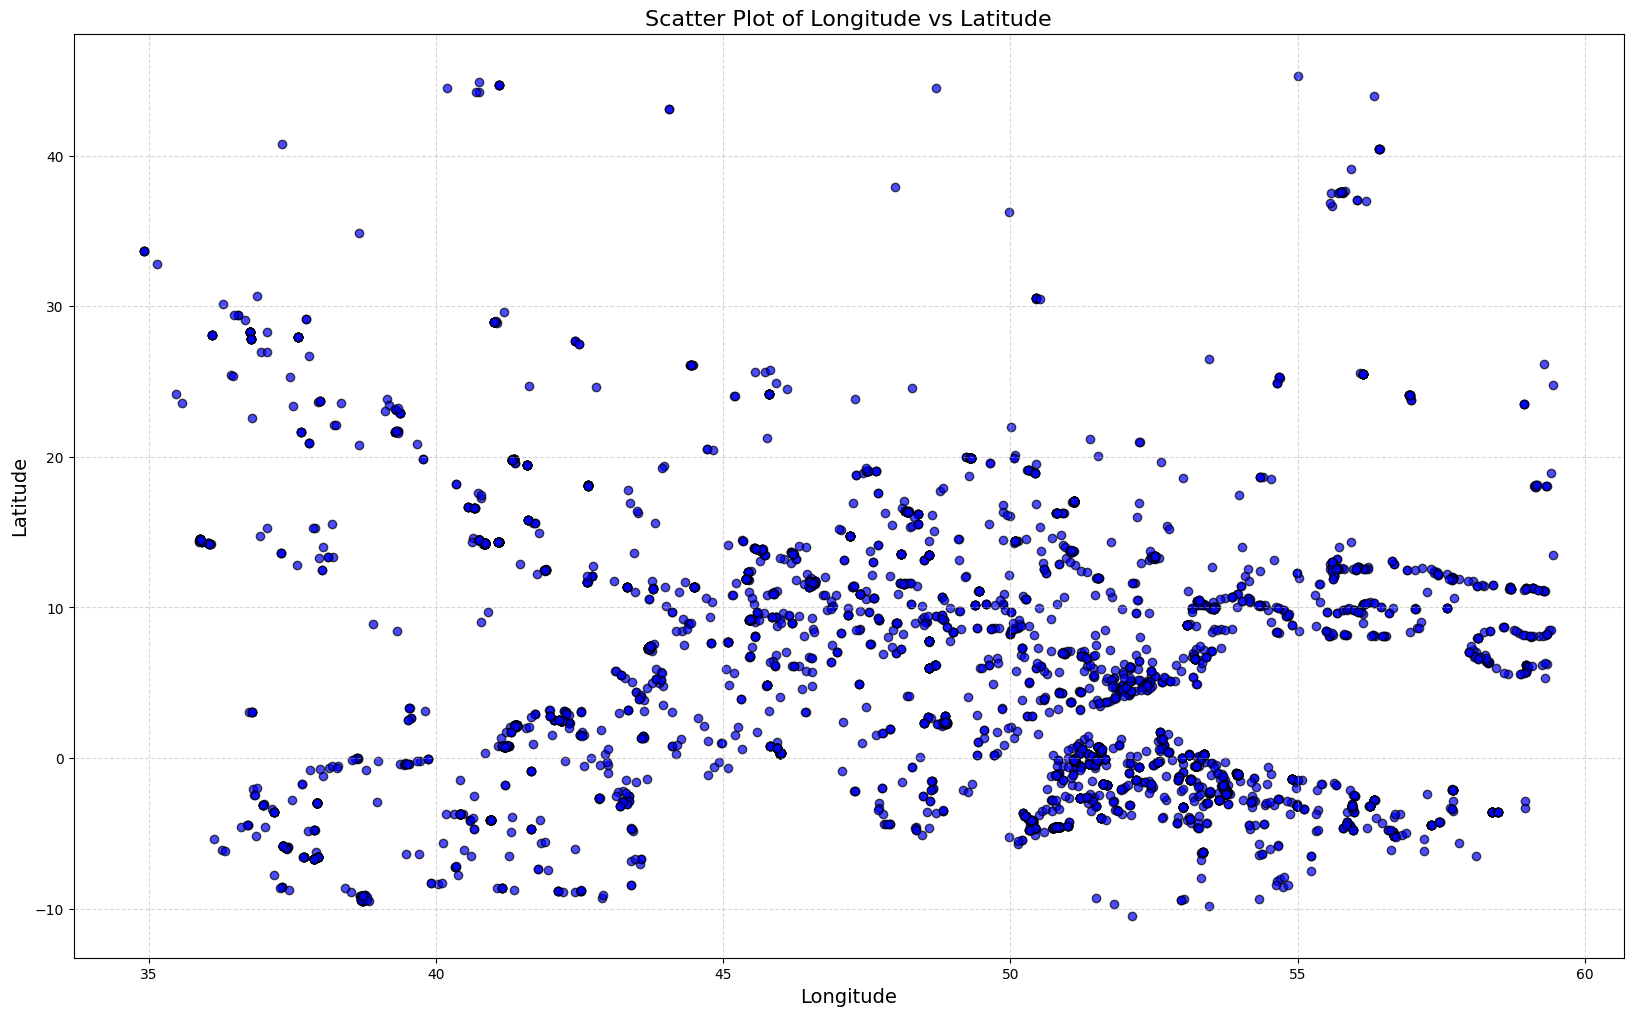

In [ ]:
# Plot the graph with Longitude on the x-axis and Latitude on the y-axis
plt.figure(figsize=(20, 12))
plt.scatter(data_cleaned['Longitude'], data_cleaned['Latitude'], c='blue', alpha=0.7, edgecolor='k')

# Set plot title and axis labels
plt.title('Scatter Plot of Longitude vs Latitude', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

In [ ]:
# checking for nan values
# Check for NaN values
print("Are there any NaN values in the dataset?", data.isnull().any().any())

# Count of NaN values in each column
print("\nNaN values per column:")
print(data.isnull().sum())

# Display rows with NaN values
print("\nRows with NaN values:")
print(data[data.isnull().any(axis=1)])


Are there any NaN values in the dataset? False

NaN values per column:
Longitude    0
Latitude     0
dtype: int64

Rows with NaN values:
Empty DataFrame
Columns: [Longitude, Latitude]
Index: []


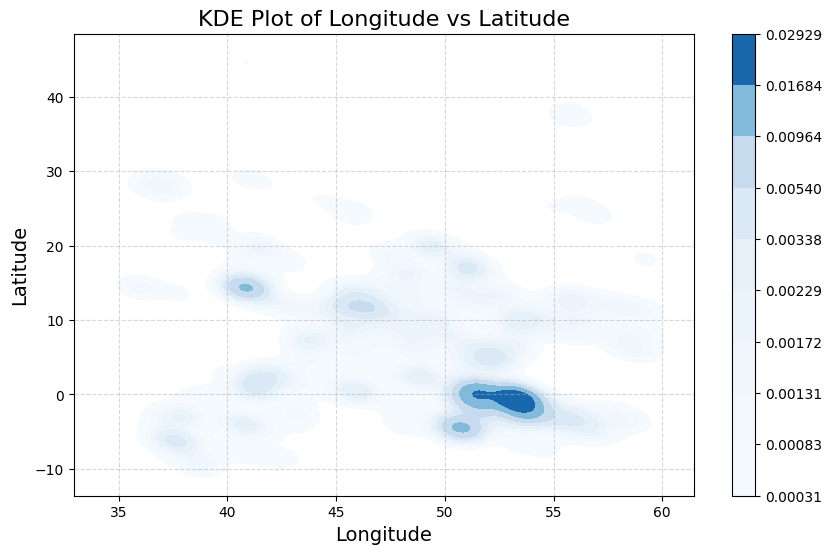

In [ ]:
# kde plot for visualisation

import seaborn as sns

# Plot the Kernel Density Estimate (KDE) for the data
plt.figure(figsize=(10, 6))
sns.kdeplot(x=data_cleaned['Longitude'], y=data_cleaned['Latitude'], cmap="Blues", fill=True, bw_adjust=0.5, cbar=True)

# Set plot title and axis labels
plt.title('KDE Plot of Longitude vs Latitude', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


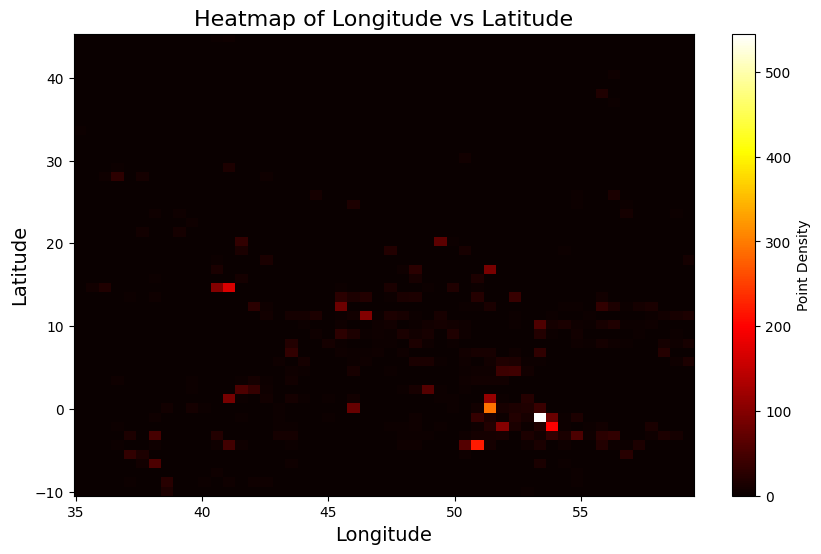

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic_2d

# Generate a 2D histogram (heatmap)
x = data_cleaned['Longitude']
y = data_cleaned['Latitude']
heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)

# Plot the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(heatmap.T, origin='lower', cmap='hot', aspect='auto',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

# Add a color bar
plt.colorbar(label='Point Density')

# Set plot title and axis labels
plt.title('Heatmap of Longitude vs Latitude', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)

# Show the plot
plt.grid(False)
plt.show()


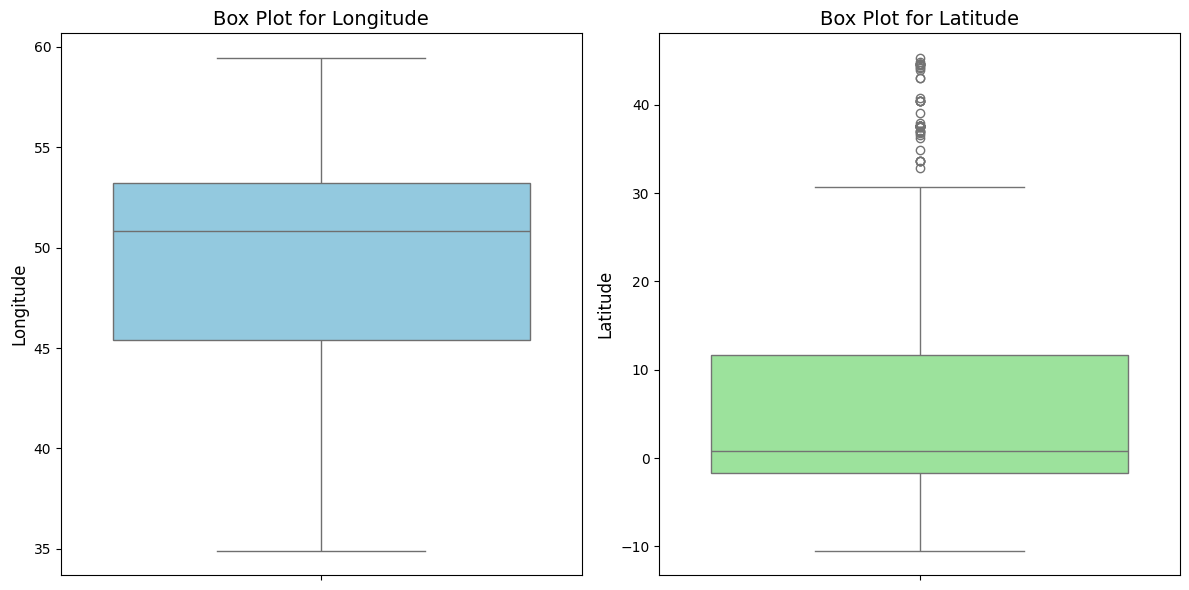

In [ ]:

# Create a figure for the box plots
plt.figure(figsize=(12, 6))

# Plot a box plot for Longitude
plt.subplot(1, 2, 1)
sns.boxplot(y=data_cleaned['Longitude'], color='skyblue')
plt.title('Box Plot for Longitude', fontsize=14)
plt.ylabel('Longitude', fontsize=12)

# Plot a box plot for Latitude
plt.subplot(1, 2, 2)
sns.boxplot(y=data_cleaned['Latitude'], color='lightgreen')
plt.title('Box Plot for Latitude', fontsize=14)
plt.ylabel('Latitude', fontsize=12)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [ ]:
data_cleaned.describe()

,Longitude,Latitude
count,5930.000000,5930.000000
mean,48.982059,4.954512
std,5.641028,8.884893
min,34.910655,-10.466312
25%,45.397196,-1.745655
50%,50.849093,0.800708
75%,53.234232,11.659166
max,59.450561,45.307594


In [ ]:
# normalising data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_cleaned_scaled = scaler.fit_transform(data_cleaned)
data_cleaned_scaled

array([[-2.14881697, -1.140488  ],
       [ 0.43997579,  0.04934894],
       [ 0.3915277 , -0.05636412],
       ...,
       [ 0.530343  , -0.09242184],
       [ 0.21723769,  0.26814955],
       [-2.07283381,  0.97165159]])

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
best_k = None
best_score = -1
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_cleaned_scaled)

    labels = kmeans.labels_  # Cluster labels for each data point
    centroids = kmeans.cluster_centers_  # Cluster centroids

    if len(set(labels)) > 1 and len(set(labels)) < len(data_cleaned_scaled):
            score = silhouette_score(data_cleaned_scaled, labels)
            if score > best_score:
                best_k = k
                best_score = score
print({'Silhouette Score': best_score})
print({'best_k':best_k})

{'Silhouette Score': 0.5424203063775316}
{'best_k': 8}


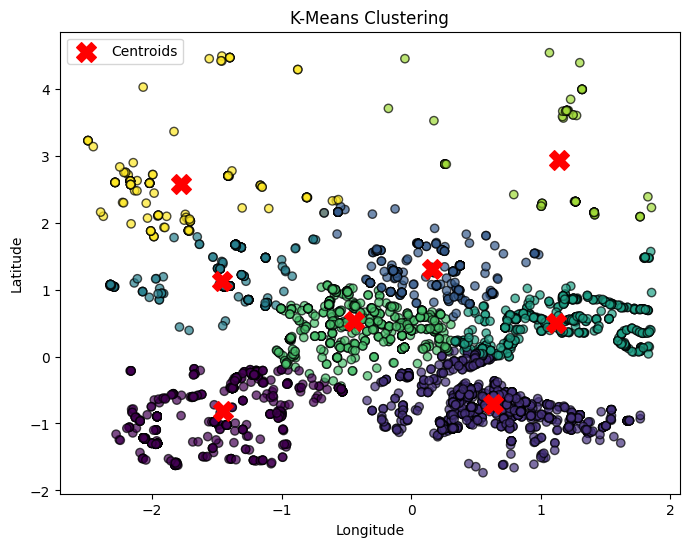

In [ ]:
# kmeans
from sklearn.cluster import KMeans
k = 8
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_cleaned_scaled)

# Step 4: Get Clustering Results
labels = kmeans.labels_  # Cluster labels for each data point
centroids = kmeans.cluster_centers_  # Cluster centroids

# Step 5: Visualize the Clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_cleaned_scaled[:, 0], data_cleaned_scaled[:, 1], c=labels, cmap='viridis', marker='o', alpha=0.7, edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', label='Centroids', marker='X')
plt.title('K-Means Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

best_eps = None
best_min_samples = None
best_score = -1

# Grid search over a range of eps and min_samples
for eps in np.arange(0.2, 1.0, 0.1):
    for min_samples in range(3, 101, 2):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data_cleaned_scaled)

        # Ignore models with only one cluster or all noise
        if len(set(labels)) > 1 and len(set(labels)) < len(data_cleaned_scaled):
            score = silhouette_score(data_cleaned_scaled, labels)
            if score > best_score:
                best_eps = eps
                best_min_samples = min_samples
                best_score = score

print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best silhouette score: {best_score}")


Best eps: 0.8000000000000003, Best min_samples: 43, Best silhouette score: 0.5862865436556118


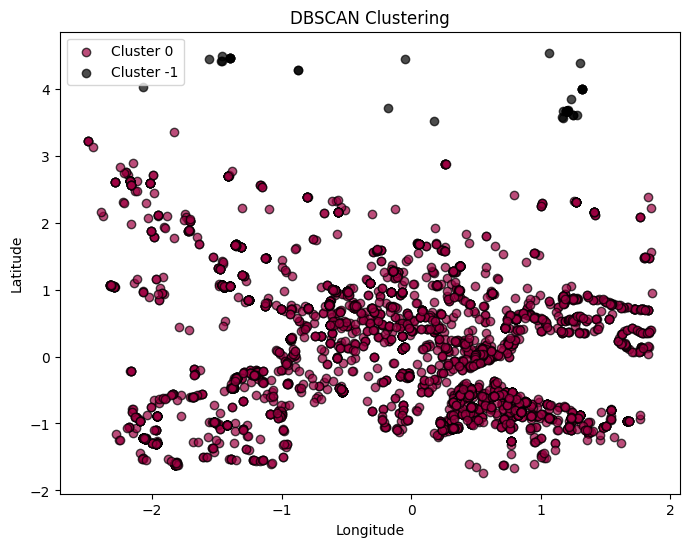

In [ ]:
# Apply DBSCAN
from sklearn.cluster import DBSCAN
# Set hyperparameters for DBSCAN
eps = 0.8  # Maximum distance between two samples for them to be considered neighbors
min_samples = 43 # Minimum number of samples in a neighborhood to form a core point

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(data_cleaned_scaled)

# Step 4: Get Clustering Results
labels = dbscan.labels_  # Cluster labels (-1 indicates noise)

# Step 5: Visualize the Clusters
plt.figure(figsize=(8, 6))
# Plot data points, using color for clusters and gray for noise
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for label, color in zip(unique_labels, colors):
    if label == -1:  # Noise points
        color = [0, 0, 0, 1]  # Black color for noise
    mask = (labels == label)
    plt.scatter(data_cleaned_scaled[mask, 0], data_cleaned_scaled[mask, 1], c=[color], label=f"Cluster {label}", marker='o', edgecolor='k', alpha=0.7)

plt.title('DBSCAN Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [ ]:
non_noise_data=data_cleaned_scaled[labels != -1]
print(len(non_noise_data))

5884


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
best_k = None
best_score = -1
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(non_noise_data)

    labels = kmeans.labels_  # Cluster labels for each data point
    centroids = kmeans.cluster_centers_  # Cluster centroids

    if len(set(labels)) > 1 and len(set(labels)) < len(non_noise_data):
            score = silhouette_score(non_noise_data, labels)
            if score > best_score:
                best_k = k
                best_score = score
print({'Silhouette Score': best_score})
print({'best_k':best_k})

{'Silhouette Score': 0.5484784920526252}
{'best_k': 5}


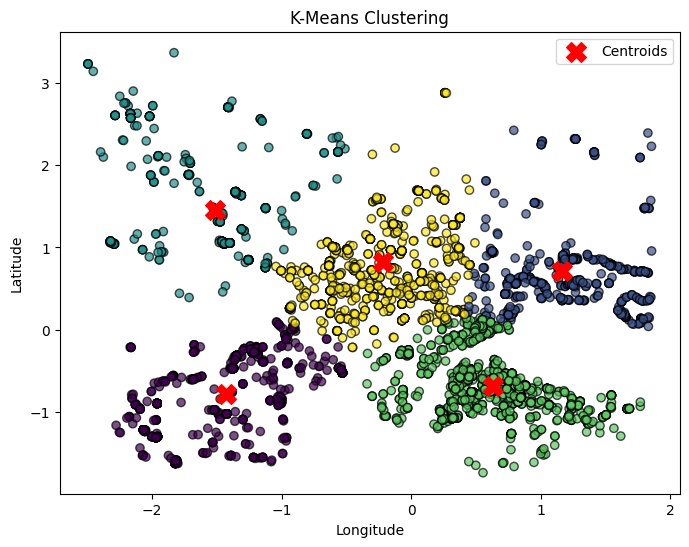

0.5484784920526252


In [ ]:
# kmeans
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(non_noise_data)

# Step 4: Get Clustering Results
labels = kmeans.labels_  # Cluster labels for each data point
centroids = kmeans.cluster_centers_  # Cluster centroids

# Step 5: Visualize the Clusters
plt.figure(figsize=(8, 6))
plt.scatter(non_noise_data[:, 0], non_noise_data[:, 1], c=labels, cmap='viridis', marker='o', alpha=0.7, edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', label='Centroids', marker='X')
plt.title('K-Means Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()
score = silhouette_score(non_noise_data, labels)
print(score)

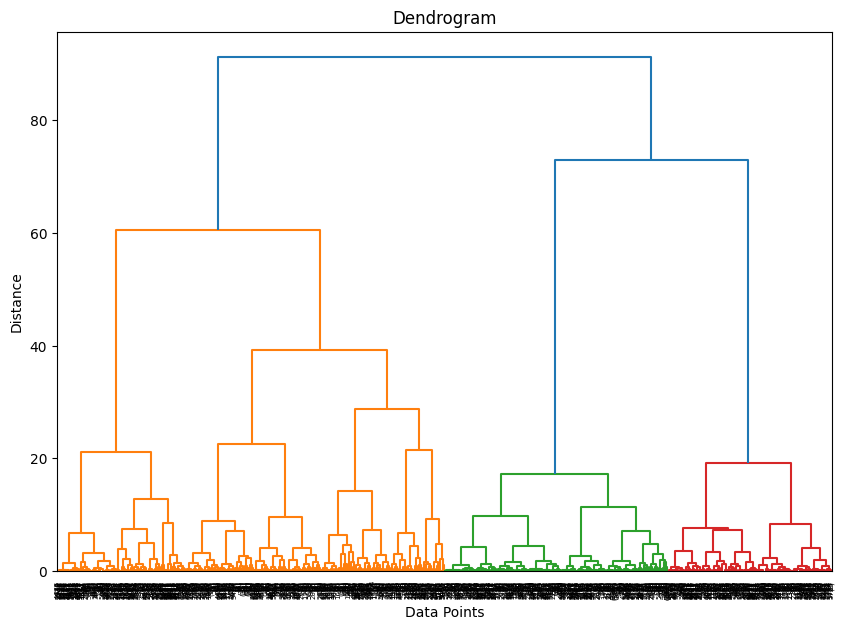

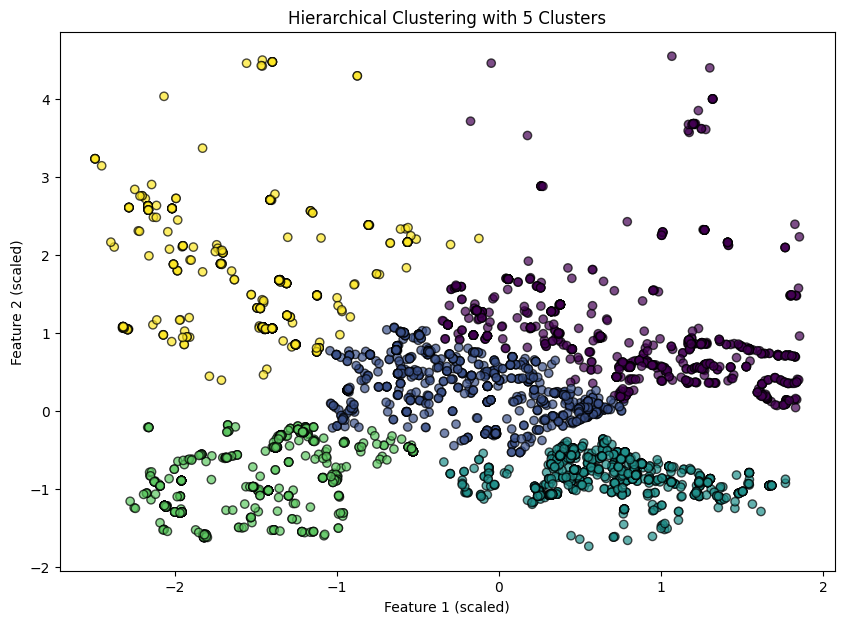

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Step 1: Load Your Data
# Replace this with your own data (e.g., pd.read_csv('your_data.csv'))
# Assuming data has columns 'Longitude' and 'Latitude'
# Example:
# data = pd.read_csv('your_data.csv')
# X = data[['Longitude', 'Latitude']].values

# Dummy Data (Replace with your actual data)
# np.random.seed(42)
# X = np.random.rand(300, 2) * 50 + 10  # Replace this with real dataset

# Step 2: Normalize the Data (optional, but recommended for clustering)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Step 3: Generate a Dendrogram to Visualize Clusters
plt.figure(figsize=(10, 7))
linked = linkage(data_cleaned_scaled, method='ward')  # Ward's method minimizes variance
dendrogram(linked, truncate_mode='level', p=10)  # Truncate for readability
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Step 4: Perform Hierarchical Clustering
n_clusters = 5  # Set the number of clusters based on the dendrogram
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
labels = hierarchical_clustering.fit_predict(data_cleaned_scaled)

# Step 5: Visualize Clusters
plt.figure(figsize=(10, 7))
plt.scatter(data_cleaned_scaled[:, 0], data_cleaned_scaled[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', alpha=0.7)
plt.title(f'Hierarchical Clustering with {n_clusters} Clusters')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.show()


In [ ]:
pip install hdbscan


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 70.6 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import hdbscan

best_min_cluster_size = None
best_min_samples = None
best_score = -1

# Grid search over a range of eps and min_samples
for min_cluster_size in np.arange(50, 300, 5):
    for min_samples in range(2, 50, 2):
        clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples, metric='euclidean')
        labels = clusterer.fit_predict(data_cleaned_scaled)

        # Ignore models with only one cluster or all noise
        if len(set(labels)) > 1 and len(set(labels)) < len(data_cleaned_scaled):
            score = silhouette_score(data_cleaned_scaled, labels)
            if score > best_score:
                best_min_cluster_size = min_cluster_size
                best_min_samples = min_samples
                best_score = score

print(f"Best eps: {best_min_cluster_size}, Best min_samples: {best_min_samples}, Best silhouette score: {best_score}")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Best eps: 50, Best min_samples: 6, Best silhouette score: 0.3150444294252785


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


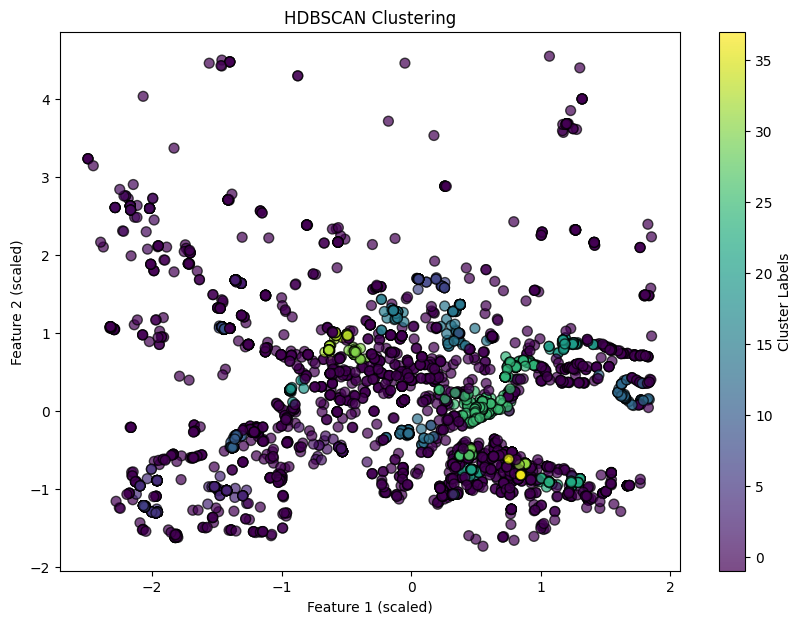

Number of clusters found: 38
Number of noise points: 2541


0.12995907682288874

In [ ]:
import hdbscan

# Apply HDBSCAN
# min_cluster_size: Minimum size of clusters
# min_samples: Minimum points to be considered core points (optional)
clusterer = hdbscan.HDBSCAN(min_cluster_size=45, min_samples=45, metric='euclidean')
labels = clusterer.fit_predict(data_cleaned_scaled)

# Step 4: Visualize Clusters
plt.figure(figsize=(10, 7))
plt.scatter(data_cleaned_scaled[:, 0], data_cleaned_scaled[:, 1], c=labels, cmap='viridis', s=50, edgecolor='k', alpha=0.7)
plt.title('HDBSCAN Clustering')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.colorbar(label='Cluster Labels')
plt.show()

# Step 5: Check Noise Points
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # -1 indicates noise
print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points: {sum(labels == -1)}")
score = silhouette_score(data_cleaned_scaled, labels)
score


In [ ]:
non_noise_data_new=data_cleaned_scaled[labels != -1]
print(len(non_noise_data_new))

4866


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
best_k = None
best_score = -1
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(non_noise_data_new)

    labels = kmeans.labels_  # Cluster labels for each data point
    centroids = kmeans.cluster_centers_  # Cluster centroids

    if len(set(labels)) > 1 and len(set(labels)) < len(non_noise_data_new):
            score = silhouette_score(non_noise_data_new, labels)
            if score > best_score:
                best_k = k
                best_score = score
print({'Silhouette Score': best_score})
print({'best_k':best_k})

{'Silhouette Score': 0.5426095302691645}
{'best_k': 7}


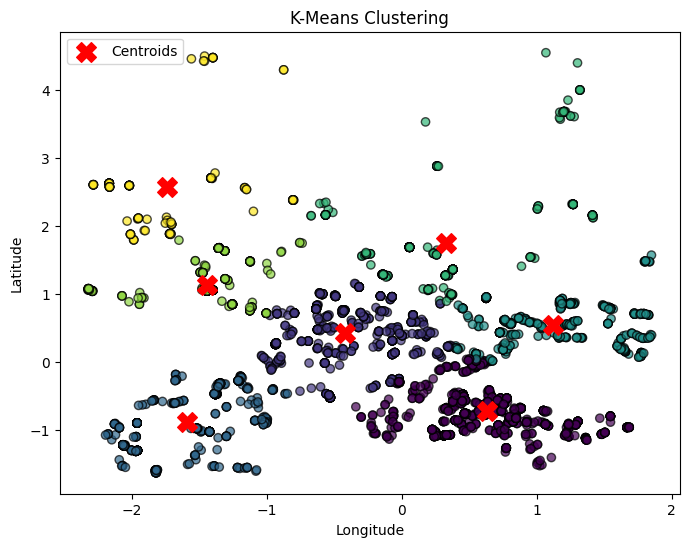

0.5426095302691645


In [ ]:
# kmeans
from sklearn.cluster import KMeans
k = 7
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(non_noise_data_new)

# Step 4: Get Clustering Results
labels = kmeans.labels_  # Cluster labels for each data point
centroids = kmeans.cluster_centers_  # Cluster centroids

# Step 5: Visualize the Clusters
plt.figure(figsize=(8, 6))
plt.scatter(non_noise_data_new[:, 0], non_noise_data_new[:, 1], c=labels, cmap='viridis', marker='o', alpha=0.7, edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', label='Centroids', marker='X')
plt.title('K-Means Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()
score = silhouette_score(non_noise_data_new, labels)
print(score)